# Feature selection

In [435]:
# loading data using .env file
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
from dotenv import load_dotenv

dotenv_path = os.getcwd()+'\\local.env'
load_dotenv(dotenv_path=dotenv_path)

%matplotlib inline

In [436]:
col_additional =['age','job','marital','education','default','housing','loan','contact','month',\
      'day_of_week','duration','campaign','pdays','previous','poutcome','emp_var_rate',\
      'cons_price_idx','cons_conf_idx','euribor3m','nr_employed','y']
df = pd.read_csv(os.getenv('bank_additional_data'), sep=';')
df.columns = col_additional
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [437]:
df.drop(['contact', 'pdays', 'poutcome'], axis=1, inplace=True)
df.shape

(41188, 18)

In [438]:
import math

df['dur_bin'] = df.duration.map(lambda x: int(math.floor(x/600)*10))

In [439]:
df.drop(df[(df.loan == 'unknown') & (df.housing == 'unknown')].index, axis=0, inplace=True)
x = {'yes': 1, 'no': 0}
df['no_of_loans'] = df['loan'].map(x) + df['housing'].map(x)
df['no_of_loans'].head(10)

0    0
1    0
2    1
3    0
4    1
5    0
6    0
7    0
8    1
9    1
Name: no_of_loans, dtype: int64

# Data Preprocessing

The features with unknown values such as job, marital, housing, loan etc where the proportion of unknowns is not very high we shall drop the records 

In [440]:
df.shape

(40198, 20)

In [441]:
for i in df:
    if df[i].dtype in ['object', 'bool']:
        print(f"_________{i}___________")
        print(df[i].value_counts())

_________job___________
admin.           10195
blue-collar       9014
technician        6596
services          3868
management        2853
retired           1676
entrepreneur      1420
self-employed     1381
housemaid         1031
unemployed         987
student            852
unknown            325
Name: job, dtype: int64
_________marital___________
married     24340
single      11288
divorced     4491
unknown        79
Name: marital, dtype: int64
_________education___________
university.degree      11891
high.school             9295
basic.9y                5894
professional.course     5118
basic.4y                4059
basic.6y                2232
unknown                 1691
illiterate                18
Name: education, dtype: int64
_________default___________
no         31825
unknown     8370
yes            3
Name: default, dtype: int64
_________housing___________
yes    21576
no     18622
Name: housing, dtype: int64
_________loan___________
no     33950
yes     6248
Name: loan, dtyp

In [442]:
df = df[df.duration > 5]

### for removal of outliers we need to check if the data is normal and if we can use zscore or percentile and whether outlier removal in necessary at all

In [443]:
from scipy.stats import skew, kurtosis

In [444]:
for i in df:
    if df[i].dtype in ['int64', 'float64']:
        print(f"_____{i}_____")
        print(f"skewness: {skew(df[i])}")
        print(f"kurtosis: {kurtosis(df[i])}")
        print()

_____age_____
skewness: 0.7880659038132295
kurtosis: 0.8025115281430995

_____duration_____
skewness: 3.26499784561028
kurtosis: 20.30981030376417

_____campaign_____
skewness: 4.674061272546491
kurtosis: 34.59006026467718

_____previous_____
skewness: 3.8323859665440962
kurtosis: 20.1839956783494

_____emp_var_rate_____
skewness: -0.7234954691102774
kurtosis: -1.0631213373503359

_____cons_price_idx_____
skewness: -0.22722251034400515
kurtosis: -0.8282702007659131

_____cons_conf_idx_____
skewness: 0.30526787895115576
kurtosis: -0.3604423477620671

_____euribor3m_____
skewness: -0.7095762265454162
kurtosis: -1.4057352229354376

_____nr_employed_____
skewness: -1.0428721731690997
kurtosis: -0.007023922958919737

_____dur_bin_____
skewness: 4.972158937511447
kurtosis: 38.063541272703105

_____no_of_loans_____
skewness: 0.35128158598861514
kurtosis: -0.6814400345126561



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


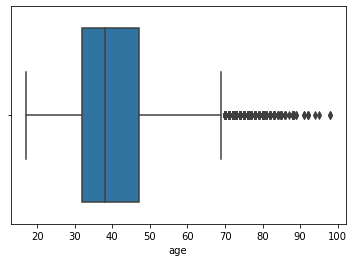

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


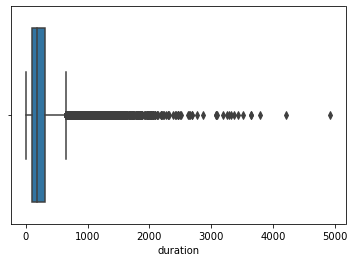

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


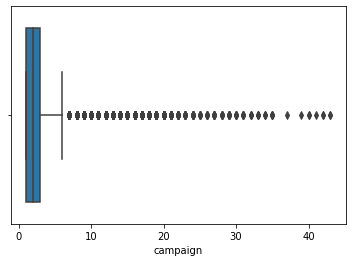

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


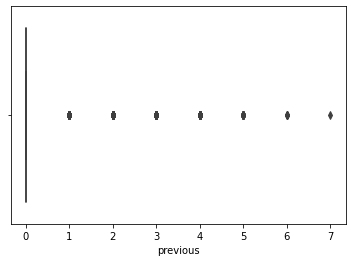

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


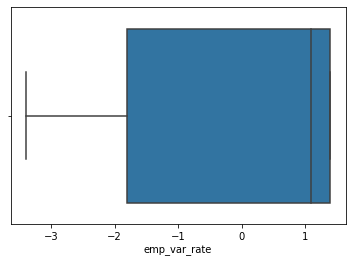

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


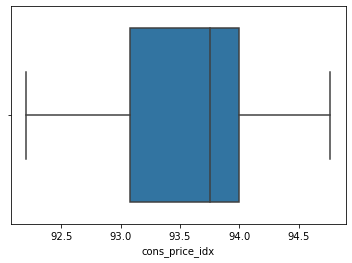

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


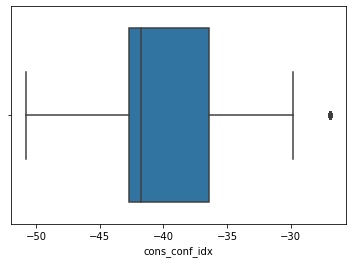

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


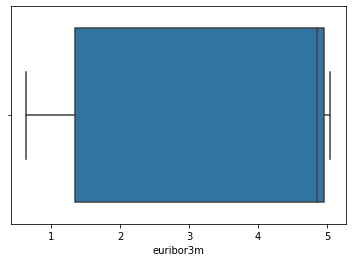

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


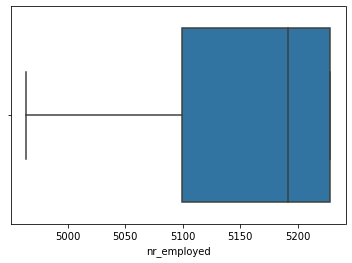

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


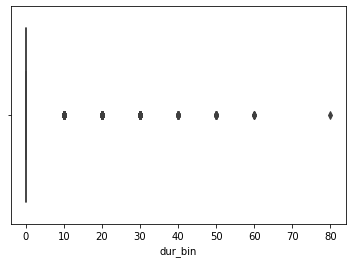

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


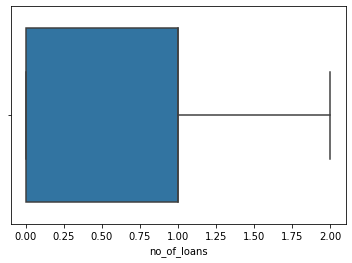

In [445]:
for i in df:
    if df[i].dtype in ['int64', 'float64']:
        sns.boxplot(df[i])
        plt.show()

In [446]:
df[df.duration >= df.age.quantile(0.90)].y.value_counts()

no     32152
yes     4532
Name: y, dtype: int64

#### other outlier removal will result in considerable data loss so we shall move ahead with label encoding

In [447]:
for i in df:
    if df[i].dtype in ['object', 'bool']:
        if i != 'default':
            df.drop(df[(df[i] == 'unknown')].index, axis=0, inplace=True)

In [448]:
df1 = df
df1.describe()

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,dur_bin,no_of_loans
count,38193.000000,38193.000000,38193.000000,38193.000000,38193.000000,38193.000000,38193.000000,38193.000000,38193.000000,38193.000000,38193.000000
mean,39.863169,258.553714,2.566465,0.169874,0.083555,93.569851,-40.540507,3.624574,5167.535268,1.006729,0.693844
std,10.288393,259.799898,2.765090,0.486728,1.566205,0.576365,4.623716,1.729618,71.643738,3.678505,0.629682
min,17.000000,6.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,0.000000
50%,38.000000,180.000000,2.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,0.000000,1.000000
75%,47.000000,320.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,1.000000
max,98.000000,4918.000000,43.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,80.000000,2.000000


In [449]:
df1[(df1.duration > df1.duration.quantile(0.90))].y.value_counts()

no     2058
yes    1752
Name: y, dtype: int64

In [450]:
df1.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,dur_bin,no_of_loans
0,56,housemaid,married,basic.4y,no,no,no,may,mon,261,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0
1,57,services,married,high.school,unknown,no,no,may,mon,149,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0
2,37,services,married,high.school,no,yes,no,may,mon,226,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,1
3,40,admin.,married,basic.6y,no,no,no,may,mon,151,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0
4,56,services,married,high.school,no,no,yes,may,mon,307,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,1


In [451]:
df1.y.value_counts()

no     33935
yes     4258
Name: y, dtype: int64

In [452]:
df1.y = df1.y.map({'yes':1,'no':0})

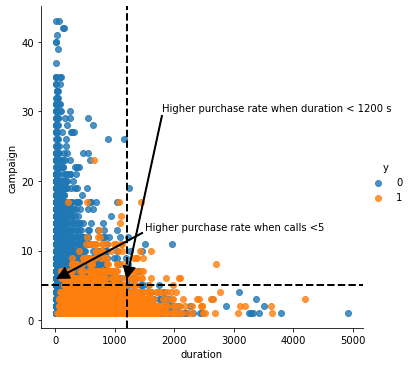

In [453]:
sns.lmplot(x='duration', y='campaign', hue='y',data=df1, fit_reg=False)
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher purchase rate when calls <5',xytext = (1500,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.axvline(x=1200, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher purchase rate when duration < 1200 s',xytext = (1800,30),
             arrowprops=dict(color = 'k', width=1),xy=(1200,6))
plt.show()

In [454]:
df2 = df1[(df1.y == 0)]
df3 = df1[(df1.y == 1)]

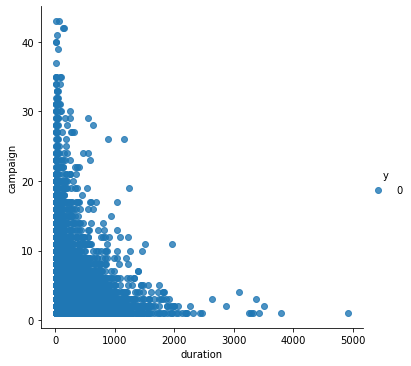

In [455]:
sns.lmplot(x='duration', y='campaign', hue='y',data=df2, fit_reg=False)

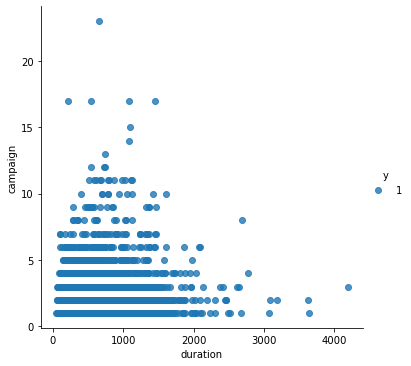

In [456]:
sns.lmplot(x='duration', y='campaign', hue='y',data=df3, fit_reg=False)

When a person has been contacted for a lower number of times and each contact in itself results in a call that is in the range of 1000-1500 seconds then the chances of getting a yes are higher

# Label Encoding

In [457]:
le = LabelEncoder()

def label_encode(df):
    classes = {}
    for i in df:
        if df[i].dtype in ['object', 'bool']:
            df[i] = le.fit_transform(df[i])
            classes.update(**{i: le.classes_})
            
    return classes

classes = label_encode(df1)
classes

{'job': array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed'], dtype=object),
 'marital': array(['divorced', 'married', 'single'], dtype=object),
 'education': array(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
        'professional.course', 'university.degree'], dtype=object),
 'default': array(['no', 'unknown', 'yes'], dtype=object),
 'housing': array(['no', 'yes'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'month': array(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
        'sep'], dtype=object),
 'day_of_week': array(['fri', 'mon', 'thu', 'tue', 'wed'], dtype=object)}

In [458]:
df1.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,dur_bin,no_of_loans
0,56,3,1,0,0,0,0,6,1,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0
1,57,7,1,3,1,0,0,6,1,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0
2,37,7,1,3,0,1,0,6,1,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1
3,40,0,1,1,0,0,0,6,1,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0
4,56,7,1,3,0,0,1,6,1,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1


## values of duration cons_price_idx and nr_employed needs to be scaled down also we need to have a column for no of loans that adds up housing and other loans

In [459]:
from sklearn.preprocessing import scale

In [460]:
# converting duration to minutes which scales down the values so no need to scale the conversation
df1['duration'] = df1.duration/60

In [461]:
df1.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,dur_bin,no_of_loans
0,56,3,1,0,0,0,0,6,1,4.350000,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0
1,57,7,1,3,1,0,0,6,1,2.483333,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0
2,37,7,1,3,0,1,0,6,1,3.766667,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1
3,40,0,1,1,0,0,0,6,1,2.516667,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0
4,56,7,1,3,0,0,1,6,1,5.116667,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1


In [462]:
df1.cons_price_idx = scale(df1.cons_price_idx)
df1.nr_employed = scale(df1.nr_employed)

# Now lets move forward towards feature selection

In [463]:
X = pd.concat([df1.iloc[:,:-3], df1.iloc[:, -2:]], axis=1)
y = df1.y

In [464]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=20)

model.fit(X, y)

RandomForestClassifier(random_state=20)

In [465]:
feature_imp = pd.DataFrame(model.feature_importances_, index=X.columns).sort_values(0, ascending=False)

In [466]:
X = df1[list(feature_imp.iloc[:15,:].index)]

# Model Selection

Here we shall use the KFold Cross validation to distribute the validation data and test data accordingly and then we shall use the cross_validation_score to check how each model performs along with validations so lets start with the usual train test split

In [467]:
test_size = 0.25
random_seed = 19

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)

In [468]:
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Here we shall test on SVM and XGBoost later on as these require some heavy compute

In [469]:
models = {
    'logr': LogisticRegression(),
    'knn': KNeighborsClassifier(n_neighbors=2),
    'Kmeans': KMeans(n_clusters=2),
    'naive_bayes': GaussianNB(),
    'MLP': MLPClassifier(hidden_layer_sizes=(64, 32, 16, 2), activation='relu'),
    'RandomF': RandomForestClassifier(n_estimators=200),
    'SVM': SVC()
}

In [470]:
from sklearn.model_selection import KFold, cross_val_score

In [471]:
model_report = {}
for key, value in models.items():
    
    # lets first create k folds of our dataset
    kfold = KFold(n_splits=10, random_state=15, shuffle=True)
    
    # now lets train and varify each model's cross validations score
    cv_report = cross_val_score(value, X_train, y=y_train, cv=kfold, scoring='accuracy')
    model_report.update(**{
        key: (cv_report, cv_report.mean(), cv_report.std())
    })

model_report

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{'logr': (array([0.9113438 , 0.9026178 , 0.9078534 , 0.90750436, 0.91026536,
         0.90398045, 0.90747207, 0.90712291, 0.89455307, 0.90083799]),
  0.9053551215303166,
  0.004742503194474004),
 'knn': (array([0.90226876, 0.89528796, 0.90191972, 0.89458988, 0.90013966,
         0.88547486, 0.89944134, 0.8924581 , 0.89420391, 0.8924581 ]),
  0.8958242295280158,
  0.0049457174331106225),
 'Kmeans': (array([0.40034904, 0.38324607, 0.61710297, 0.61815009, 0.62081006,
         0.39560056, 0.61452514, 0.37849162, 0.61417598, 0.60649441]),
  0.5248945932902396,
  0.11081008723134225),
 'naive_bayes': (array([0.85724258, 0.8565445 , 0.87260035, 0.87015707, 0.85614525,
         0.85230447, 0.86557263, 0.85265363, 0.87011173, 0.84706704]),
  0.8600399251221154,
  0.008426594017955034),
 'MLP': (array([0.8938918 , 0.89773124, 0.91204188, 0.91588133, 0.91340782,
         0.87744413, 0.90956704, 0.90607542, 0.90886872, 0.90398045]),
  0.9038889823237494,
  0.010954053452681321),
 'RandomF': (array

In [472]:
# clearly logistic regression is the way to go

In [473]:
y.value_counts()

0    33935
1     4258
Name: y, dtype: int64